<a href="https://colab.research.google.com/github/JiaLong0209/coding365/blob/master/AI_python/final_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from keras import datasets, layers, models
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0


170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
def showImage(x,y):
    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(x[i])
        plt.xlabel(class_names[y[i][0]])
    plt.show()

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# showImage(train_images, train_labels)

In [ ]:
from keras.layers.normalization.batch_normalization_v1 import BatchNormalization
model = models.Sequential()
kernel_size = [64,128,256,512]

model.add(layers.Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())

for i,kernel in enumerate(kernel_size):
    model.add(layers.Conv2D(kernel, (3, 3), activation='relu',padding='same'))
    model.add(layers.Conv2D(kernel, (3, 3), activation='relu',padding='same'))
    if(i > len(kernel_size)/2): model.add(layers.Conv2D(kernel, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.BatchNormalization())

model.add(layers.Dense(10))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0

In [ ]:

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    horizontal_flip=True,
)

new_images = np.repeat(train_images, 2, axis=0)
new_labels = np.repeat(train_labels, 2, axis=0)
batch_size =  len(new_images)

print(train_images.shape, train_labels.shape)
print(new_images.shape, new_labels.shape)

# showImage(train_images, train_labels)

datagen.fit(new_images)

img_iter = datagen.flow(new_images, new_labels, batch_size=batch_size)
x, y = img_iter.next()
print(x.shape, y.shape)

callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience = 12)


(50000, 32, 32, 3) (50000, 1)
(100000, 32, 32, 3) (100000, 1)


In [ ]:
print(new_images.shape)

(100000, 32, 32, 3)


In [ ]:
batch_size = 128

# print(train_images.shape, train_labels.shape)

model.compile(
            optimizer='rmsprop',
            loss=tf.keras.losses.SparseCategoricalCrosentropy(from_logits=True),
            metrics=['accuracy']
            )


history = model.fit(
                    # train_images, train_labels,
                    x,y,
                    epochs=40,
                    validation_data=(test_images, test_labels),
                    batch_size=batch_size,
                    callbacks=[callback]
                    )

Epoch 1/40
782/782 [==============================] - 61s 51ms/step - loss: 1.4684 - accuracy: 0.4723 - val_loss: 2.2216 - val_accuracy: 0.4085
Epoch 2/40
782/782 [==============================] - 38s 49ms/step - loss: 0.8414 - accuracy: 0.7087 - val_loss: 3.0188 - val_accuracy: 0.3276
Epoch 3/40
782/782 [==============================] - 40s 51ms/step - loss: 0.6100 - accuracy: 0.7923 - val_loss: 0.7508 - val_accuracy: 0.7618
Epoch 4/40
782/782 [==============================] - 40s 52ms/step - loss: 0.4699 - accuracy: 0.8391 - val_loss: 0.5740 - val_accuracy: 0.8076
Epoch 5/40
782/782 [==============================] - 39s 50ms/step - loss: 0.3625 - accuracy: 0.8765 - val_loss: 1.0005 - val_accuracy: 0.7253
Epoch 6/40
782/782 [==============================] - 39s 50ms/step - loss: 0.2844 - accuracy: 0.9031 - val_loss: 1.0070 - val_accuracy: 0.7278
Epoch 7/40
782/782 [==============================] - 39s 50ms/step - loss: 0.2199 - accuracy: 0.9253 - val_loss: 0.7032 - val_accuracy:

In [ ]:
batch_size = 64

model.compile(
            # optimizer='rmsprop',
            tf.keras.optimizers.Adam(learning_rate=0.0003),
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy']
            )


history2 = model.fit(
                    train_images, train_labels,
                    epochs=40,
                    validation_data=(test_images, test_labels),
                    batch_size=batch_size,
                    callbacks=[callback]
                    )

Epoch 1/40
782/782 [==============================] - 36s 33ms/step - loss: 0.2206 - accuracy: 0.9297 - val_loss: 0.3445 - val_accuracy: 0.8874
Epoch 2/40
782/782 [==============================] - 25s 32ms/step - loss: 0.1033 - accuracy: 0.9660 - val_loss: 0.3913 - val_accuracy: 0.8926
Epoch 3/40
782/782 [==============================] - 27s 34ms/step - loss: 0.0523 - accuracy: 0.9831 - val_loss: 0.4636 - val_accuracy: 0.8855
Epoch 4/40
782/782 [==============================] - 25s 33ms/step - loss: 0.0364 - accuracy: 0.9882 - val_loss: 0.5630 - val_accuracy: 0.8806
Epoch 5/40
782/782 [==============================] - 27s 34ms/step - loss: 0.0326 - accuracy: 0.9890 - val_loss: 0.5019 - val_accuracy: 0.8870
Epoch 6/40
782/782 [==============================] - 27s 34ms/step - loss: 0.0261 - accuracy: 0.9919 - val_loss: 0.5689 - val_accuracy: 0.8820
Epoch 7/40
782/782 [==============================] - 25s 33ms/step - loss: 0.0257 - accuracy: 0.9915 - val_loss: 0.6099 - val_accuracy:

In [ ]:

# 以下因為 Colab 的系統RAM不足，導致程式中斷沒有跑到。

batch_size = 32

model.compile(
            # optimizer='rmsprop',
            tf.keras.optimizers.Adam(learning_rate=0.0001),
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy']
            )


history3 = model.fit(
                    train_images, train_labels,
                    # x,y,
                    epochs=40,
                    validation_data=(test_images, test_labels),
                    batch_size=batch_size,
                    callbacks=[callback]
                    )

313/313 - 2s - loss: 0.9189 - accuracy: 0.8656 - 2s/epoch - 6ms/step
0.8655999898910522


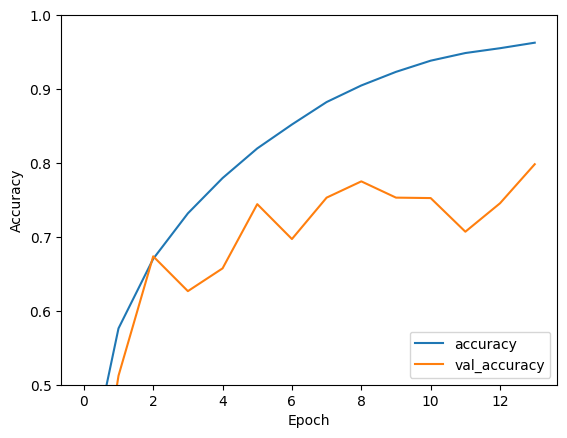

In [ ]:

hist = [history,history2,history3]
acc_list = [acc for i in hist for acc in i.history['accuracy']]
val_acc_list = [acc for i in hist for acc in i.history['val_accuracy']]

print(acc_list)

plt.plot(acc_list, label='accuracy')
plt.plot(val_acc_list, label = 'val_accuracy')
plt.title('Cifar10')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

# print(test_loss)
print(test_acc)

In [ ]:
model.save('drive/MyDrive/00AI/final5_model')

# best : epochs = 2/40 in 2th stage, batch = 64
# loss: 0.1033 - accuracy: 0.9660 - val_loss: 0.3913 - val_accuracy: 0.8926

# original : epochs = 10, batch = 64
#  loss: 0.5924 - accuracy: 0.7902
#- val_loss: 0.8711 - val_accuracy: 0.7118
